# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load DM01-31_study.txt  DM01-31_test.txt files as csv 

In [2]:
def save_DataFrame(subject_ID):
    
    globals()['DM{:0>2}_study'.format(subject_ID)] = pd.read_csv('Homework2_Datat_MemoryExperimet/DMdata/DM{:0>2}/DM{:0>2}_study.txt'.format(subject_ID,subject_ID),
                                                                  sep='\t', index_col=False)
    globals()['DM{:0>2}_test'.format(subject_ID)] = pd.read_csv('Homework2_Datat_MemoryExperimet/DMdata/DM{:0>2}/DM{:0>2}_test.txt'.format(subject_ID,subject_ID),
                                                                 sep='\t', index_col=False)

In [3]:
for subject_ID in range(1,32):
    save_DataFrame(subject_ID)

# Response rate

### Response rate DataFrame

In [4]:
def Response_rate_DataFrame(Subject_id):
    
    # sort response
    
    DM_test = globals()["DM{:0>2}_test".format(Subject_id)]
    list = []
    
    for type, res in [*zip(DM_test['Task_Type'],DM_test['Res1'])]:
    
        if (type,res) == (0,1):
            list.append('HIT-HC')
        
        elif (type,res) == (0,2):
            list.append('HIT-LC')
        
        elif (type,res) == (0,3):
            list.append('MISS-LC')
        
        elif (type,res) == (0,4):
            list.append('MISS-HC')
        
        elif (type,res) == (1,1):
            list.append('FA-HC')        
        
        elif (type,res) == (1,2):
            list.append('FA-LC')
       
        elif (type,res) == (1,3):
            list.append('CR-LC')
       
        elif (type,res) == (1,4):
            list.append('CR-HC')

    DM_test['sort'] = list
    
    
    # create Response rate DataFrame
    
    array = np.array(DM_test['sort'].value_counts()) / 256
    globals()["DM{:0>2}_sort_probability".format(subject_ID)] = pd.DataFrame(array, columns=['DM{:0>2}_1'.format(subject_ID)],
                                                                             index=DM_test['sort'].value_counts().index)
    
    DM_sort_probability = globals()["DM{:0>2}_sort_probability".format(subject_ID)]
    global df_1
    
    df_1 = pd.concat([df_1, DM_sort_probability], axis=1)
    df_1 = df_1.fillna(0)

In [5]:
df_1 = pd.DataFrame({'Task_Type': ['Old','Old','Old','Old','New','New','New','New']},
                     index = ['HIT-HC','HIT-LC','MISS-LC','MISS-HC','FA-HC','FA-LC','CR-LC','CR-HC'])

for subject_ID in range(1,32):
    Response_rate_DataFrame(subject_ID)

### Response rate plot

In [6]:
def Response_rate_plot(df):
    
    # error value
    
    ci95 = 1.96 * (df.std(axis=1) / 31**(1/2))
    
    
    # plot
    
    sns.barplot(df.index, df.mean(axis=1), yerr=ci95, hue=df['Task_Type'])
    plt.ylabel('Response rate')

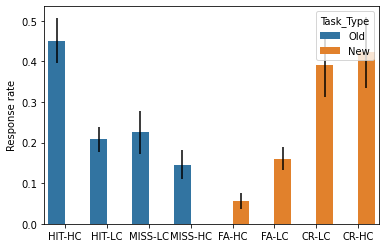

In [7]:
Response_rate_plot(df_1)

# Source memory correct rate

### Source memory correct rate DataFrame

In [8]:
def Source_memory_correct_rate_DataFrame(subject_ID):
    
    # merge DM_study, DM_test : left on = 'ObjID', right on = 'Object_ID'
    
    DM_study = globals()["DM{:0>2}_study".format(subject_ID)]
    DM_test = globals()["DM{:0>2}_test".format(subject_ID)]
    
    merge = pd.merge(DM_study, DM_test[DM_test['Task_Type']==0], left_on='ObjID', right_on='Object_ID')
    globals()["DM{:0>2}_merge".format(subject_ID)] = merge[merge['Res2']!=5].reset_index()
    
    DM_merge = globals()["DM{:0>2}_merge".format(subject_ID)]
    list = []

    
    # sort if 'LocID' == 'Res2'
    
    for i in range(len(DM_merge)):
    
        if DM_merge['LocID'][i] == DM_merge['Res2'][i]:
            list.append('Y')
        else:
            list.append('N')

    DM_merge['true'] = list
    
    
    # create Source memory correct rate DataFrame
    
    C1 = DM_merge['sort']
    C2 = DM_merge['true']
    zero = np.zeros(4)

    if len(DM_merge[C1=='HIT-HC'])!=0:
        zero[0] = len(DM_merge[(C1=='HIT-HC') & (C2=='Y')]) / len(DM_merge[C1=='HIT-HC'])
   
    if len(DM_merge[C1=='HIT-LC'])!=0:
        zero[1] = len(DM_merge[(C1=='HIT-LC') & (C2=='Y')]) / len(DM_merge[C1=='HIT-LC'])
    
    if len(DM_merge[C1=='MISS-LC'])!=0:
        zero[2] = len(DM_merge[(C1=='MISS-LC') & (C2=='Y')]) / len(DM_merge[C1=='MISS-LC'])
    
    if len(DM_merge[C1=='MISS-HC'])!=0:
        zero[3] = len(DM_merge[(C1=='MISS-HC') & (C2=='Y')]) / len(DM_merge[C1=='MISS-HC'])

    globals()["DM{:0>2}_true_probability".format(subject_ID)] = pd.DataFrame(zero, 
                                                                             columns=["DM{:0>2}_2".format(subject_ID)],
                                                                             index=['HIT-HC','HIT-LC','MISS-LC','MISS-HC'])
    
    DM_true_probability = globals()["DM{:0>2}_true_probability".format(subject_ID)]
    global df_2
    
    df_2 = pd.concat([df_2, DM_true_probability], axis=1)

In [9]:
df_2 = pd.DataFrame()

for subject_ID in range(1,32):
    Source_memory_correct_rate_DataFrame(subject_ID)

### Source memory correct rate plot

In [10]:
def Source_memory_correct_rate_plot(df):
    
    # error value
    
    ci95 = 1.96 * (df.std(axis=1) / 31**(1/2))
    
    
    # plot
    
    sns.barplot(df.index, df.mean(axis=1), yerr=ci95)
    plt.axhline(0.25, color='black', ls='--')
    plt.ylabel('Source memory correct rate')

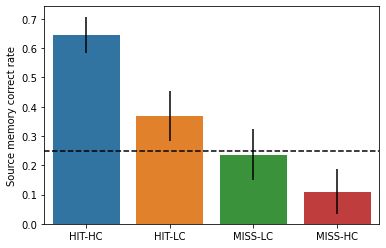

In [11]:
Source_memory_correct_rate_plot(df_2)